### Medicare Physician & Other practitioners-by geography and service.

1)Medicare is the federal government plan in the U.S. for paying certain hospital and medical expenses for elderly persons qualifying under the plan

2)This data information on services and procedures provided to original medicare (fee-to-service)

3)The medicare physician & other practitioners by geography and service dataset contains information on use, payments, submitted charges, and beneficiary demographic and health characteristics organized by geography, Health care common procedure coding system (HCPCS) code, and place of service.

### Data Description

1) Geography level (Rndrng_prvdr_Geo_lvl):
The feature contains the level of geography State and National, National indicates across all states.

2) Rendering Provider geography code (Rndrng_prvdr_Geo_cd):
FIPS code of the remaining provider state. This feature is blank when reported at the national level.

3) Rendering provider Geography Description (Rndrng_prvdr_Geo_Desc):
In this state, names were provided by the united states
Data aggregated at the National level are identified by the word 'National'.

4) HCPCS Code (HCPCS_Cd):
It identifies code of health care.

5) HCPCS Description (HCPCS_Desc):
This Description is intended to help healthcare consumers who are not medical professionals understand clinical procedures on bills and patient portals. It is associated with HCPCS Code.

6) HCPCS Drug indicators(HCPCS_Drug_ind):
It identifies whether the HCPCS Code for the specific service furnished by the provider is an HCPCS listed to the medicare

7) Place of Service (place_of_srvc):
It identifies whether the place of service submitted on the claims is a facility (Values of 'F').
Non-facility (Values of 'O'), Non-facility is generally an office setting. However, others entities are included in non-facility.

8) Number of providers (Tot_Rndrng_prvdrs):
Number of providers with HCPCS Code and place of services.

9) Number of services (Tot_srvcs):
The Number of services provided: note that the metrics used to count the number provided can vary from service to service.

10) Number of medicare benefits (Tot_Benes):
The number of distinct medicare beneficiaries receiving the services for each Rndrng_Prvdr_Geo-dESC AND HCPCS_Cd, Place_of_srvc

11) Number of Distinct medicare Beneficiary/ Per day services (Tot_Bene_Day_srvcs):
Given beneficiaries may receive multiple services of the same type (eg. single vs multiple cardiac stents) on a single day

12) Average submitted charge Amount (Avg_sbmtd_chrg):
Average of the charges that providers submitted for the service.

13) Average Medicare Allowed Amount (Avg_mdcr_alowd_Amt):
Average medicare allowed amount for the service. medicare allowed amounts include the amount Medicare pays, the deductible and co-insurance amount that the beneficiary is responsible for paying, and any amounts that a third party is responsible for paying.

14) Average medicare payment amount (Avg_mdcr_pymt_Amt):
The average amount that Medicare paid after deductible and co-insurance amounts have been deducted for the line item service.

15) Average medicare standardized payment amount (Avg_mdcr_stdzd_Amt):
The average amount that medicare paid after beneficiary deductible and co-insurance amounts have been deducted for the line item service and after standardization of the medicare payment has been applied.
It removes geographic difference in the payments rates for individual services.

### Aim: To Predict Average Medicare Allowed Amount Avg_Mdcr_Alowd_Amt

Average of the Medicare allowed amount for the service. Medicare allowed amounts includes the amount Medicare pays, the deductible and coinsurance amounts that the beneficiary is responsible for paying, and any amounts that a third party is responsible for paying

In [1]:
#Importing the necessary tools for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Downloads/Medicare.csv",low_memory=False)

In [3]:
#We can observe the dataset by checking a few of the rows using head() method
#which is returns the first five samples from the dataset
df.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,10,86,86,86,$32.99,$17.50,$17.50,$16.82
1,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,"1,809","159,365","159,385","159,385",$31.26,$16.79,$16.79,$16.62
2,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,53,279,279,279,$66.48,$28.18,$28.18,$27.93
3,National,NaN,National,0003M,Liver dis 10 assays w/nash,N,O,14,88,88,88,$572.58,$453.14,$451.14,$485.02
4,National,NaN,National,0005U,Test for detecting genes associated with prost...,N,O,1,"4,886","4,939","4,939",$795.00,$755.01,$755.01,$745.00


In [4]:
#info() method shows some of the characteristics of the data such as column name, No. of null-values in columns
#Dtype of the data, and memory Usage.
df.info()
#Rndrng_prvdr_Geo_Cd feature has null values
#Rndrng_Prvdr_Geo_Desc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268149 entries, 0 to 268148
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Rndrng_Prvdr_Geo_Lvl   268149 non-null  object
 1   Rndrng_Prvdr_Geo_Cd    255046 non-null  object
 2   Rndrng_Prvdr_Geo_Desc  268134 non-null  object
 3   HCPCS_Cd               268149 non-null  object
 4   HCPCS_Desc             268149 non-null  object
 5   HCPCS_Drug_Ind         268149 non-null  object
 6   Place_Of_Srvc          268149 non-null  object
 7   Tot_Rndrng_Prvdrs      268149 non-null  object
 8   Tot_Benes              268149 non-null  object
 9   Tot_Srvcs              268149 non-null  object
 10  Tot_Bene_Day_Srvcs     268149 non-null  object
 11  Avg_Sbmtd_Chrg         268149 non-null  object
 12  Avg_Mdcr_Alowd_Amt     268149 non-null  object
 13  Avg_Mdcr_Pymt_Amt      268149 non-null  object
 14  Avg_Mdcr_Stdzd_Amt     268149 non-null  object
dtype

In [5]:
df.isnull().sum().sort_values(ascending=False)

Rndrng_Prvdr_Geo_Cd      13103
Rndrng_Prvdr_Geo_Desc       15
Rndrng_Prvdr_Geo_Lvl         0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

In [6]:
# filling with most common class
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,06,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,10,86,86,86,$32.99,$17.50,$17.50,$16.82
1,National,06,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,"1,809","159,365","159,385","159,385",$31.26,$16.79,$16.79,$16.62
2,National,06,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,53,279,279,279,$66.48,$28.18,$28.18,$27.93
3,National,06,National,0003M,Liver dis 10 assays w/nash,N,O,14,88,88,88,$572.58,$453.14,$451.14,$485.02
4,National,06,National,0005U,Test for detecting genes associated with prost...,N,O,1,"4,886","4,939","4,939",$795.00,$755.01,$755.01,$745.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268144,State,9E,Foreign Country,G2058,"Chronic care management services, each additio...",N,O,1,62,333,243,$36.64,$36.64,$29.31,$29.71
268145,State,9E,Foreign Country,J0897,"Injection, denosumab, 1 mg",Y,O,3,14,"1,140",19,$34.42,$19.51,$15.27,$15.06
268146,State,9E,Foreign Country,J1030,"Injection, methylprednisolone acetate, 40 mg",Y,O,2,14,15.5,16,$24.84,$6.06,$4.20,$4.14
268147,State,9E,Foreign Country,J3301,"Injection, triamcinolone acetonide, not otherw...",Y,O,4,16,78,19,$32.85,$1.38,$0.98,$1.05


In [7]:
# Creating dataframes for data cleaning it easy to clean large dataset
numericint = df_clean[['Tot_Rndrng_Prvdrs','Tot_Benes','Tot_Bene_Day_Srvcs']]

In [8]:
numericfloat = df_clean[['Tot_Srvcs','Avg_Sbmtd_Chrg','Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt']]

In [9]:
objectcols = df_clean[['Rndrng_Prvdr_Geo_Lvl','Rndrng_Prvdr_Geo_Cd','Rndrng_Prvdr_Geo_Desc','HCPCS_Cd','HCPCS_Drug_Ind','Place_Of_Srvc']]

In [10]:
#This feature has text column. we can ignore this column
objectcols_text = df_clean[['HCPCS_Desc']]

### Data Cleaning

#### 1) Numericint:

In [11]:
numericint.Tot_Rndrng_Prvdrs = numericint.Tot_Rndrng_Prvdrs.str.replace(",","")

C:\Users\91798\.conda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
numericint.Tot_Benes = numericint.Tot_Benes.str.replace(",","")

In [13]:
numericint.Tot_Bene_Day_Srvcs = numericint.Tot_Bene_Day_Srvcs.str.replace(",","")

In [14]:
numericint = numericint.astype('int32')

#### 2)numericfloat:

In [15]:
numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace(",","")

In [16]:
numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_26900/4225982932.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace("$","")


In [17]:
numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace(",","")

In [18]:
numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_26900/831516647.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace("$","")


In [19]:
numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace(",","")

In [20]:
numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_26900/116582745.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace("$","")


In [21]:
numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace(",","")

In [22]:
numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_26900/1361927190.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace("$","")


In [23]:
numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace(",","")

In [24]:
numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace("$","")

C:\Users\91798\AppData\Local\Temp/ipykernel_26900/193031717.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace("$","")


In [25]:
numericfloat = numericfloat.astype('float64')

In [26]:
#Lets combine all the numeric columns together as one data frame
numcols = pd.concat([numericint,numericfloat],axis=1)
numcols.shape

(268149, 8)

### Finding the correlation between variables

In [27]:
import seaborn as sns

<AxesSubplot:>

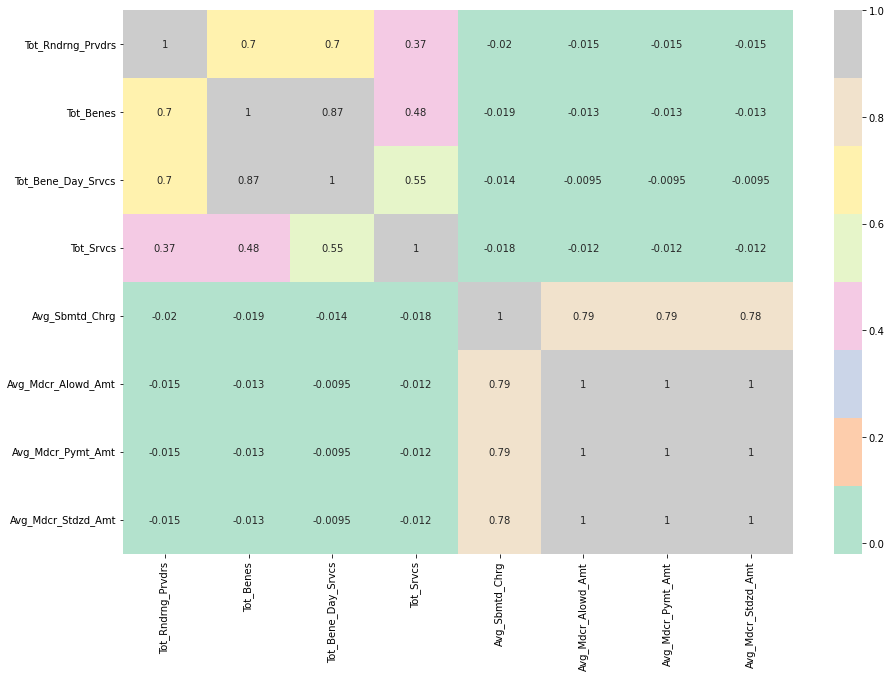

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(numcols.corr(),annot=True,cmap='Pastel2')

### Combining all dataframes into a single data frame

In [29]:
combinedf = pd.concat([objectcols,numcols],axis=1)

In [30]:
combinedf.shape

(268149, 14)

In [31]:
combinedf.describe()
#For the Target Variable- When mean > median then the data is aid to be positively skewed.
# Therefore "Avg_Mdcr_Alowd_Amt" is Positively Skewed.

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Bene_Day_Srvcs,Tot_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
count,268149.000000,2.681490e+05,2.681490e+05,2.681490e+05,268149.000000,268149.000000,268149.000000,268149.000000
mean,265.080384,5.102847e+03,9.813789e+03,2.217960e+04,1252.792847,294.650539,234.689176,231.083291
std,3217.362460,1.093134e+05,2.935606e+05,5.981873e+05,2377.146048,769.097494,615.856301,609.502232
min,1.000000,1.100000e+01,1.100000e+01,1.100000e+01,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000e+01,3.800000e+01,4.000000e+01,125.930000,36.350000,28.720000,28.520000
50%,29.000000,1.040000e+02,1.400000e+02,1.570000e+02,429.060000,114.710000,88.850000,87.750000
75%,95.000000,5.650000e+02,8.010000e+02,1.027000e+03,1551.450000,324.140000,257.900000,255.130000
max,581706.000000,2.179407e+07,8.171052e+07,1.221294e+08,92910.470000,50821.880000,40603.950000,40010.080000


### 'Skewness' and 'Kurtosis' - Metrics for understanding the Data distribution :

#### Skewness : It is the Measure of Assymetry of the Curve

1) If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.

2) If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.

3) If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

#### Kurtosis : The height of the Distribution Curve with respect to Normal Distribution

1) It tells us if the data is heavy or light tailed relative to a normal distribution.

2) Kurtosis range from -10 to +10.

In [32]:
#Impact before Logarithmic Transformation
from scipy.stats import kurtosis,skew
print(combinedf.Avg_Mdcr_Alowd_Amt.skew())
print(combinedf.Avg_Mdcr_Alowd_Amt.kurt())

30.406919766372464
1652.1810788820355


<AxesSubplot:ylabel='Density'>

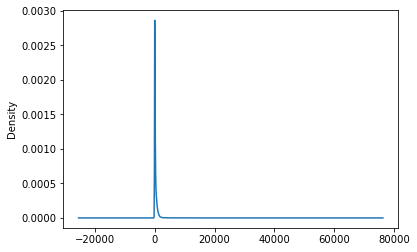

In [33]:
combinedf.Avg_Mdcr_Alowd_Amt.plot(kind ='density')

In [34]:
# Impact of Logarithmic Transformation
print(np.log(combinedf.Avg_Mdcr_Alowd_Amt).skew())
print(np.log(combinedf.Avg_Mdcr_Alowd_Amt).kurt())

nan
nan


C:\Users\91798\.conda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
combinedf['Avg_Mdcr_Alowd_Amt'].isna().sum()

0

It's giving us nan because there are some values as the zero. In log transformation, it deals with only the postive
and negative numbers, not with zero. The log is the range in between (-infinity to infinity) but grater or lesss than zero. 

We are getting zeros inside the data, we refer to root Transformation.

#### Root Transformation

It is a transformation with a moderate effect on distribution shape. It is weaker than the logarithm and cube root. 

It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values. Note that the square root of an area has the units of a length. It is commonly applied to counted data, especially if the values are mostly rather small.

In [36]:
#calculating the square root for Avg_Mdcr_Alowd_Amt column
print(np.sqrt(combinedf.Avg_Mdcr_Alowd_Amt).skew())
print(np.sqrt(combinedf.Avg_Mdcr_Alowd_Amt).kurt())

2.7842587934632936
24.062205856778522


<AxesSubplot:ylabel='Density'>

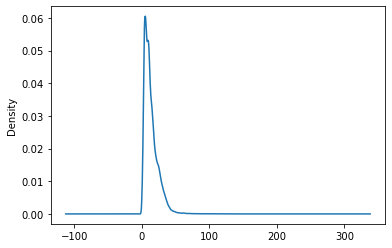

In [37]:
np.sqrt(combinedf.Avg_Mdcr_Alowd_Amt).plot(kind="density")

Note: In the previous case, we got the nan because of zero, but the square root transformation has reduced the skewed and kurtosis values.

#### Cube Root Transformation

This is fairly strong transformation with a substantial effect on distribution shape.

It is weaker than the logarithm but stronger than the square root transformation.

It is also used for reducing right skewness and has the advantage that it can be applied to zero and negative values.

In [38]:
#calculating the cub root for Avg_Mdcr_Alowd_Amt column
print(np.cbrt(combinedf.Avg_Mdcr_Alowd_Amt).skew())
print(np.cbrt(combinedf.Avg_Mdcr_Alowd_Amt).kurt())

1.215156912362404
4.028614277454736


<AxesSubplot:ylabel='Density'>

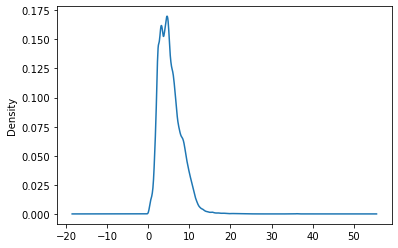

In [39]:
np.cbrt(combinedf.Avg_Mdcr_Alowd_Amt).plot(kind="density")

### Inferential Statisitics:

#### Two Sample Independent T test:

It is a method used to test whether the unknown population means two groups are equal or not.

1) Dependent variable must continuous and close to Normal Distribution.

2) Independent Variable should be categorical with exactly 2 levels.

In [40]:
from scipy.stats import ttest_ind

#### Test Null : There is significant difference in the average of Avg_Mdcr_Alowd_Amt and HCPCS_Drug_Ind

In [41]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.HCPCS_Drug_Ind).mean()

HCPCS_Drug_Ind
N    298.910456
Y    205.912610
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [42]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.HCPCS_Drug_Ind).var()

HCPCS_Drug_Ind
N    3.457226e+05
Y    5.703696e+06
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [43]:
no = combinedf[combinedf.HCPCS_Drug_Ind == "N"]
yes = combinedf[combinedf.HCPCS_Drug_Ind == "Y"]

In [44]:
ttest_ind(no.Avg_Mdcr_Alowd_Amt,yes.Avg_Mdcr_Alowd_Amt,equal_var = False)
#since p values is less than 0.5 fail to reject Null Hypothesis

Ttest_indResult(statistic=4.309391788106315, pvalue=1.649710649988432e-05)

#### Test Null: There is significant difference in the average of Avg_Mdcr_Alowd_Amt and Rndrng_Prvdr_Geo_Lvl

In [45]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Rndrng_Prvdr_Geo_Lvl).std()

Rndrng_Prvdr_Geo_Lvl
National    783.725745
State       767.917916
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [46]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Rndrng_Prvdr_Geo_Lvl).mean()

Rndrng_Prvdr_Geo_Lvl
National    404.405607
State       289.018654
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [47]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Rndrng_Prvdr_Geo_Lvl).var()

Rndrng_Prvdr_Geo_Lvl
National    614226.043667
State       589697.926308
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [48]:
National = combinedf[combinedf.Rndrng_Prvdr_Geo_Lvl=="National"]
State = combinedf[combinedf.Rndrng_Prvdr_Geo_Lvl=="State"]

In [49]:
ttest_ind(National.Avg_Mdcr_Alowd_Amt,State.Avg_Mdcr_Alowd_Amt, equal_var=False)
#since p values is less than 0.5 fail to reject Null Hypothesis

Ttest_indResult(statistic=16.44321855327275, pvalue=3.31436357563779e-60)

#### Test Null: There is significant difference in the average of Avg_Mdcr_Alowd_Amt and Plce_of_Srvc

In [50]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Place_Of_Srvc).mean()

Place_Of_Srvc
F    369.615985
O    208.101677
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [51]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Place_Of_Srvc).var()

Place_Of_Srvc
F    262925.566081
O    956894.459772
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [52]:
Fy = combinedf[combinedf.Place_Of_Srvc == "F"]
NFy = combinedf[combinedf.Place_Of_Srvc == "O"]

In [53]:
ttest_ind(Fy.Avg_Mdcr_Alowd_Amt,NFy.Avg_Mdcr_Alowd_Amt,equal_var=False)
#since p values is less than 0.05 Fail to reject Null Hypothesis

Ttest_indResult(statistic=52.35192082622477, pvalue=0.0)

### Chi Square Test of Independence:

It is a method of finding if there is any Association netween two variables

The variables are Categorical

In [54]:
from scipy.stats import chi2_contingency

#### Test Null: There is No Association between Rndrng_Prvdr_Geo_Lvl and HCPCS_Drug_Ind

In [55]:
pd.crosstab(combinedf.Rndrng_Prvdr_Geo_Lvl,combinedf.HCPCS_Drug_Ind)

HCPCS_Drug_Ind,N,Y
Rndrng_Prvdr_Geo_Lvl,,
National,12511,577
State,243355,11706


In [56]:
chi2_contingency(pd.crosstab(combinedf.Rndrng_Prvdr_Geo_Lvl,combinedf.HCPCS_Drug_Ind))
#since p-value > 0.05 Reject Null

(0.8908680659992385,
 0.3452421786500288,
 1,
 array([[ 12488.48292554,    599.51707446],
        [243377.51707446,  11683.48292554]]))

#### Test Null: There is No Association between Rndrng_Prvdr_Geo_Lvl and Place_Of_Srvc

In [57]:
pd.crosstab(combinedf.Rndrng_Prvdr_Geo_Lvl,combinedf.Place_Of_Srvc)

Place_Of_Srvc,F,O
Rndrng_Prvdr_Geo_Lvl,,
National,7008,6080
State,136682,118379


In [58]:
chi2_contingency(pd.crosstab(combinedf.Rndrng_Prvdr_Geo_Lvl,combinedf.Place_Of_Srvc))
#since p-value > 0.05 Reject Null

(0.0075030154243613525,
 0.9309736091340755,
 1,
 array([[  7013.31990796,   6074.68009204],
        [136676.68009204, 118384.31990796]]))

#### Test Null: There is No Association between HCPCS_Drug_Ind and Place_Of_Srvc

In [59]:
pd.crosstab(combinedf.HCPCS_Drug_Ind,combinedf.Place_Of_Srvc)

Place_Of_Srvc,F,O
HCPCS_Drug_Ind,,
N,143316,112550
Y,374,11909


In [60]:
chi2_contingency(pd.crosstab(combinedf.HCPCS_Drug_Ind,combinedf.Place_Of_Srvc))
#since p-value < 0.05 Reject Null 

(13218.60491351658,
 0.0,
 1,
 array([[137108.04642195, 118757.95357805],
        [  6581.95357805,   5701.04642195]]))

### Data Transformation:

### Label Encoding Object Columns:

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
objectencoded = objectcols.apply(le.fit_transform)

In [64]:
combinedf = pd.concat([objectencoded,numcols],axis = 1)

In [65]:
combinedf.shape

(268149, 14)

#### Lets Divide the data into two parts X and y

In [66]:
# Since there is high collinearity between 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt' and 'Avg_Mdcr_Allowd_Amt'
# I have dropped variables Avg_Mdcr_Pymt_Amt and 'Avg_Mdcr_Stdzd_Amt'
y = combinedf.Avg_Mdcr_Alowd_Amt
X = combinedf.drop(['Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt','Avg_Mdcr_Alowd_Amt'],axis=1)

In [67]:
X.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Bene_Day_Srvcs,Tot_Srvcs,Avg_Sbmtd_Chrg
0,0,4,33,0,0,0,10,86,86,86.0,32.99
1,0,4,33,0,0,1,1809,159365,159385,159385.0,31.26
2,0,4,33,1,0,1,53,279,279,279.0,66.48
3,0,4,33,2,0,1,14,88,88,88.0,572.58
4,0,4,33,3,0,1,1,4886,4939,4939.0,795.00


In [68]:
y.head()

0     17.50
1     16.79
2     28.18
3    453.14
4    755.01
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

#### Training and Testing

Now let's split the data into a training set and testing set. We will train out model on the training set and then use the test to evaluate the model

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size=0.7, random_state= 25)

### Feature scaling

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)

In [71]:
X_train.shape, y_train.shape

((187704, 11), (187704,))

In [72]:
X_test.shape, y_test.shape

((80445, 11), (80445,))

### Model Building

As the Dependent Variable is "Continous", Let us build Regression Models.

#### Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
#making prediction
Predict = lr.predict(X_test)
Predict

array([359.87721887,  64.18219957,  78.51275447, ..., 973.51140952,
       -73.80566439,  43.38180218])

In [75]:
# Train Score
training_model_score = lr.score(X_train, y_train)*100
print("Model Score Training data",training_model_score)

Model Score Training data 64.3716298352296


In [76]:
##Test Score
testing_model_score = lr.score(X_test,y_test)*100
print("Model score of Testing data",testing_model_score)

Model score of Testing data 63.21703601618107


In [77]:
from sklearn.metrics import r2_score
score = r2_score(y_test,Predict)*100
print('Model score:',score)

Model score: 63.21703601618107


In [78]:
cross_val_score(lr,X_test,y_test)

array([0.64528312, 0.60223301, 0.68470226, 0.650946  , 0.60503072])

In [79]:
np.mean([0.64528312, 0.60223301, 0.68470226, 0.650946  , 0.60503072])

0.6376390220000001

In [80]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,Predict)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,Predict)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, Predict))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 145.08928205182667
Mean Square Error (MSE): 210918.1917595839
Root Mean Square Error (RMSE): 459.2583061410908


#### Decision Tree Regression

In [81]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=16)
treemodel = tree.fit(X_train, y_train)

In [82]:
#Predicting
Pred = treemodel.predict(X_test)
Pred

array([ 423.16648225,   30.63493355,   32.50079498, ..., 1169.76238095,
        100.95142857,   87.62346801])

In [83]:
#Train score
train_score = treemodel.score(X_train,y_train)*100
print('Training score:',train_score)

Training score: 97.33627047494667


In [84]:
#Test score
test_score = treemodel.score(X_test,y_test)*100
print('Testing_score:',test_score)

Testing_score: 81.85165075530415


In [85]:
score = r2_score(y_test, Pred)*100
print('Model score:',score)

Model score: 81.85165075530415


In [86]:
cross_val_score(treemodel,X_test,y_test)

array([0.88699249, 0.4830897 , 0.76376433, 0.89648884, 0.88652837])

In [87]:
np.mean([0.88699249, 0.4830897 , 0.76376433, 0.89648884, 0.88652837])

0.7833727460000001

In [88]:
MAE=metrics.mean_absolute_error(y_test,Pred)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,Pred)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, Pred))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 96.95683753094185
Mean Square Error (MSE): 104064.94179741853
Root Mean Square Error (RMSE): 322.5909822010196


#### Random Forest Regression

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=15,n_estimators=70)
rfmodel = rf.fit(X_train, y_train)

In [90]:
#Predicting
Predict1 = rfmodel.predict(X_test)
Predict1

array([318.5204133 ,  31.78101459,  31.79960252, ..., 706.7916063 ,
        96.25094957,  82.12811439])

In [91]:
#Training Score
Train_score = rfmodel.score(X_train,y_train)*100
print('Training score:',Train_score)

Training score: 96.74858115988933


In [92]:
#Testing score
Test_score = rfmodel.score(X_test,y_test)*100
print('Testing_score:',Test_score)

Testing_score: 89.36321208560136


In [93]:
Score = r2_score(y_test,Predict1)*100
print('Model Score',Score)

Model Score 89.36321208560136


In [94]:
cross_val_score(rfmodel,X_test,y_test)

array([0.91223348, 0.82651894, 0.87385751, 0.92143795, 0.88702446])

In [95]:
np.mean([0.91223348, 0.82651894, 0.87385751, 0.92143795, 0.88702446])

0.884214468

In [96]:
MAE = metrics.mean_absolute_error(y_test,Predict1)
print('Mean Absolute Error (MAE):',MAE)
mse = metrics.mean_squared_error(y_test,Predict1)
print('Mean Squared Error (MSE):',mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test,Predict1))
print('Root Mean Squared Error (RMSE):',rmse)              

Mean Absolute Error (MAE): 85.3120461251461
Mean Squared Error (MSE): 60992.6941728264
Root Mean Squared Error (RMSE): 246.9669900469016


#### Gradient Boosting Algorithm

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=300)
gbmodel = gb.fit(X_train,y_train)

In [98]:
#Predicting
Predict2 = gbmodel.predict(X_test)
Predict2

array([310.96662005,  28.52412068,  33.49970711, ..., 821.57652196,
        85.02969443,  61.30619407])

In [99]:
#Training score
Training_score = gbmodel.score(X_train,y_train)*100
print('Train score:',Training_score)

Train score: 93.0868434469984


In [100]:
#Testing score
Testing_score = gbmodel.score(X_test,y_test)*100
print('Test score:',Testing_score)

Test score: 90.3140149504709


In [101]:
Score = r2_score(y_test,Predict2)*100
print('Model score:',Score)

Model score: 90.3140149504709


In [102]:
cross_val_score(gbmodel,X_test,y_test)

array([0.91461841, 0.85956855, 0.84420567, 0.91359395, 0.91734943])

In [103]:
np.mean([0.91461841, 0.85956855, 0.84420567, 0.91359395, 0.91734943])

0.8898672019999999

In [104]:
MAE = metrics.mean_absolute_error(y_test,Predict2)
print('Mean Absolute Error (MAE):',MAE)
MSE = metrics.mean_squared_error(y_test,Predict2)
print('Mean Squared Error (MSE):',MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,Predict2))
print('Root Mean Squared Error (RMSE):',RMSE)

Mean Absolute Error (MAE): 91.89470789221673
Mean Squared Error (MSE): 55540.66966859302
Root Mean Squared Error (RMSE): 235.6706805451052


In [105]:
from PIL import Image

In [111]:
img = Image.open('Performance Metrics.png')

## Model Performance Metrics:

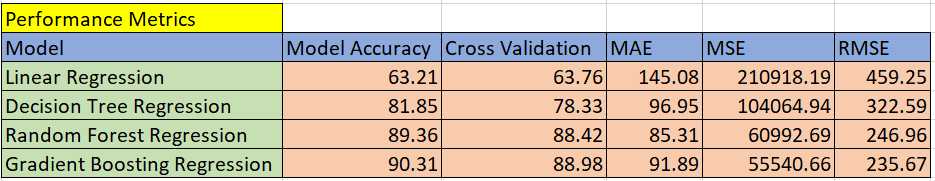

In [112]:
img

### Conclusion:

1)Gradient Boosting Model (n_estimators = 300) has the highest accuracy compared to all other models.

2)In cross validation Gradient Boosting Model has perform highly.